In [1]:
%load_ext autoreload
%autoreload 2
%cd /home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering

/home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering


# Process datasets

In [2]:
savinase = 'AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGI_STHPDLNIRGGASFVPGEPST_QDGNGHGTHVAGTIAALNNSIGVLGVAPSAELYAVKVLGASGSGSVSSIAQGLEWAGNNGMHVANLSLGSPSPSATLEQAVNSATSRGVLVVAASGNSGA_GS___ISYPARYANAMAVGATDQNNNRASFSQYGAGLDIVAPGVNVQSTYPGSTYASLNGTSMATPHVAGAAALVKQKNPSWSNVQIRNHLKNTATSLGSTNLYGSGLVNAEAATR'

def get_seq_from_mutations(mutations, wt_seq=savinase):
    seq = list(wt_seq)
    for mutation in mutations.split('/'):
        if mutation:
            pos, aa = mutation[1:-1], mutation[-1]
            pos = int(pos) - 1  # Convert to zero-based index
            seq[pos] = aa
    return ''.join(seq).replace('_', '')


## Process all variant data

In [3]:
import pandas as pd

df_data = pd.read_csv('data/round2/wet-lab/data_all.csv')
df = df_data[['sequence', 'activity_final']].rename(columns={'activity_final': 'fitness', 'sequence': 'seq'}).dropna(subset=['seq', 'fitness'])
df['seq'] = df['seq'].str.replace('*', '', regex=False)
df['seq'] = df['seq'].str.replace('-', '', regex=False)
df['seq_len'] = df['seq'].str.len()

df = df[df['seq_len'] == len(savinase.replace('_', ''))]
# drop duplicates
df = df.drop_duplicates(subset=['seq'])
print(len(df))
df.describe()

2608


,fitness,seq_len
count,2608.000000,2608.0
mean,1.539942,269.0
std,0.717798,0.0
min,0.000000,269.0
25%,1.045224,269.0
50%,1.430150,269.0
75%,1.970794,269.0
max,4.642172,269.0


## Process the top variant data

In [4]:
df_top_muts = pd.read_csv('data/round2/wet-lab/final_variants_selected.csv')
df_top_muts#.head()

,Round,Variants,Activity,Mutations
0,R1,MC3-1-H7,1.44,S3Y/S24P/A98S/A169G/G202C/Y209H/T213R/N218S/T2...
1,R1,MC3-4-H12,2.63,S3V/S24P/N43K/A98S/Y209L/T213R/N218S/T224A/S25...
2,R1,MC3-7-G5,2.77,S24P/A98S/Q206L/Y209H/T213R/N218S/T224A/S256K/...
3,R1,MC3-8-B10,2.77,S3T/S24P/N43K/A98S/Y209L/T213R/N218S/T224A/S256K
4,R1,MC4-1-D7,3.03,S3V/N76D/N204S/Y209L/T213E/N218S/T224A/S256N
5,R1,MC5-1-B10,3.04,S3T/S24C/N43R/A98S/P131D/Y209L/T213A/N218S/T22...
6,R1,MC5-3-C9,2.70,S3T/S24C/N43R/A98S/P131T/A152S/A169G/Y209H/T21...
7,R1,MC5-6-H6,3.02,S3T/A98S/P131T/Y209L/T213A/N218S/T224A/S256Y/E...
8,R1,MC5-8-E12,2.68,S3T/S24C/N43R/A98S/P131D/Y209L/T213A/N218S/T22...
9,R2,R2-3-A4,3.95,S3V/A88S/A98S/S99N/P131S/Y209L/T213A/N218S/T22...


In [5]:
df_top_muts['seq'] = df_top_muts['Mutations'].apply(lambda x: get_seq_from_mutations(x, wt_seq=savinase))
df_top_muts.head()

,Round,Variants,Activity,Mutations,seq
0,R1,MC3-1-H7,1.44,S3Y/S24P/A98S/A169G/G202C/Y209H/T213R/N218S/T2...,AQYVPWGISRVQAPAAHNRGLTGPGVKVAVLDTGISTHPDLNIRGG...
1,R1,MC3-4-H12,2.63,S3V/S24P/N43K/A98S/Y209L/T213R/N218S/T224A/S25...,AQVVPWGISRVQAPAAHNRGLTGPGVKVAVLDTGISTHPDLKIRGG...
2,R1,MC3-7-G5,2.77,S24P/A98S/Q206L/Y209H/T213R/N218S/T224A/S256K/...,AQSVPWGISRVQAPAAHNRGLTGPGVKVAVLDTGISTHPDLNIRGG...
3,R1,MC3-8-B10,2.77,S3T/S24P/N43K/A98S/Y209L/T213R/N218S/T224A/S256K,AQTVPWGISRVQAPAAHNRGLTGPGVKVAVLDTGISTHPDLKIRGG...
4,R1,MC4-1-D7,3.03,S3V/N76D/N204S/Y209L/T213E/N218S/T224A/S256N,AQVVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRGG...


In [ ]:
df_data = df.merge(df_top_muts, on='seq', how='left')
df_data.sort_values(by='fitness', ascending=False, inplace=True)
# drop duplicates based on 'seq' and keep the first occurrence
df_data.drop_duplicates(subset='seq', keep='first', inplace=True)
df_data['Variants'] = df_data.apply(lambda row: 'WT' if row['seq']== savinase.replace('_', '') else row['Variants'], axis=1)
df_data.rename(columns={'Variants': 'name'}, inplace=True)
df_data.to_csv('data/round2/wet-lab/data.csv', index=False)

# df_data = pd.read_csv('data/round2/wet-lab/data.csv')
print(df_data.shape)
df_data[~df_data['name'].isna()]# .head()

(2608, 7)


,seq,fitness,seq_len,Round,name,Activity,Mutations
2393,AQTVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLRIRGG...,4.007708,269,R2,R2-10-B11,4.01,S3T/N43R/N76D/A98S/S99N/P131S/A194S/Y209L/T213...
2385,AQVVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRGG...,3.947949,269,R2,R2-3-A4,3.95,S3V/A88S/A98S/S99N/P131S/Y209L/T213A/N218S/T22...
2389,AQVVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRGG...,3.538720,269,R2,R2-4-H5,3.54,S3V/N76D/A88S/A98S/S99N/P131S/N185D/Y209L/T213...
2394,AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLEIRGG...,3.119478,269,R2,R2-10-D8,3.12,N43E/A88S/A98S/S99N/P131S/A194S/Y209L/T213A/N2...
8,AQTVPWGISRVQAPAAHNRGLTGCGVKVAVLDTGISTHPDLRIRGG...,3.039118,269,R1,MC5-1-B10,3.04,S3T/S24C/N43R/A98S/P131D/Y209L/T213A/N218S/T22...
1,AQVVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRGG...,3.029921,269,R1,MC4-1-D7,3.03,S3V/N76D/N204S/Y209L/T213E/N218S/T224A/S256N
3,AQTVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRGG...,3.021990,269,R1,MC5-6-H6,3.02,S3T/A98S/P131T/Y209L/T213A/N218S/T224A/S256Y/E...
2388,AQTVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLKIRGG...,2.982435,269,R2,R2-3-F1,2.98,S3T/N43K/A88S/A98S/S99N/P131S/N185D/A194S/Y209...
2386,AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLRIRGG...,2.889944,269,R2,R2-3-A5,2.89,N43R/A98S/S99N/P131S/N185Q/Y209L/T213A/N218S/T...
2387,AQVVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRGG...,2.882562,269,R2,R2-3-E4,2.88,S3V/A88S/A98S/S99N/P131S/N185Q/Y209L/T213A/N21...


## Prepare for pLM embedding

In [8]:
def create_fasta_file_for_data(data_path):
    df_data = pd.read_csv(f'{data_path}/data.csv')

    with open(f'{data_path}/data.fasta', 'w') as f:
        for i, row in df_data.iterrows():
            f.write(f">{i}\n")
            f.write(f"{row['seq']}\n")

create_fasta_file_for_data('data/round2/wet-lab')

## Load embeddings

In [9]:
import numpy as np

dir_path = 'data/round2/wet-lab'
features = np.load(f"{dir_path}/ProtT5-XL/ProtT5-XL.npy")

df_data.shape

(2608, 7)

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)
print(pca_result.shape)

df_data['x'] = pca_result[:, 0]
df_data['y'] = pca_result[:, 1]
df_data['z'] = df_data['fitness']

df_top = df_data[~df_data['name'].isna()]
df_top.head()

(2608, 2)


,seq,fitness,seq_len,Round,name,Activity,Mutations,x,y,z
2393,AQTVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLRIRGG...,4.007708,269,R2,R2-10-B11,4.01,S3T/N43R/N76D/A98S/S99N/P131S/A194S/Y209L/T213...,-0.000049,0.006257,4.007708
2385,AQVVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRGG...,3.947949,269,R2,R2-3-A4,3.95,S3V/A88S/A98S/S99N/P131S/Y209L/T213A/N218S/T22...,0.015328,-0.041884,3.947949
2389,AQVVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRGG...,3.538720,269,R2,R2-4-H5,3.54,S3V/N76D/A88S/A98S/S99N/P131S/N185D/Y209L/T213...,-0.067019,-0.003569,3.538720
2394,AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLEIRGG...,3.119478,269,R2,R2-10-D8,3.12,N43E/A88S/A98S/S99N/P131S/A194S/Y209L/T213A/N2...,-0.025333,0.006058,3.119478
8,AQTVPWGISRVQAPAAHNRGLTGCGVKVAVLDTGISTHPDLRIRGG...,3.039118,269,R1,MC5-1-B10,3.04,S3T/S24C/N43R/A98S/P131D/Y209L/T213A/N218S/T22...,0.011047,-0.011457,3.039118


# Show the original data points in the PCA + pLM embedding space

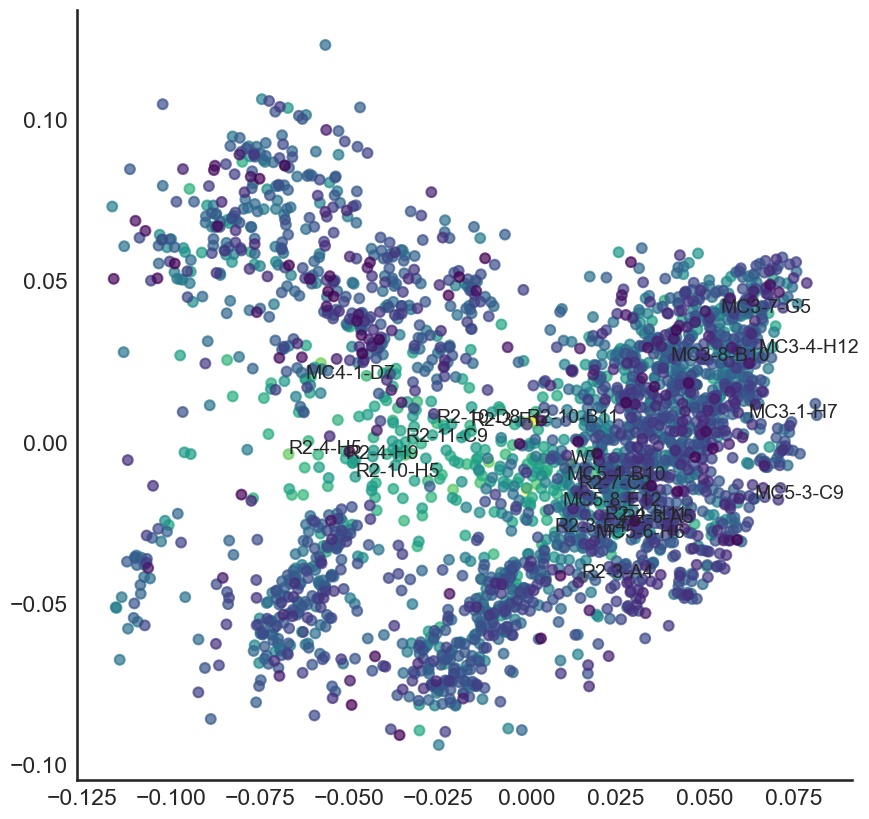

In [13]:
import matplotlib.pyplot as plt
from utils import plot_style_utils

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plt.subplots(figsize=(10, 10))
plot_style_utils.prettify_ax(ax)

ax.scatter(df_data.x, df_data.y, c=df_data.fitness, cmap='viridis', s=50, alpha=0.7)

for idx, row in df_top.iterrows():
    ax.annotate(row['name'], (row.x, row.y), fontsize=14)

# Augment fitness with 'zero fitness' points

-0.11657596339005659 0.08139916158168899 -0.09372535059194197 0.12331318885599446 0.0 4.64217191270078


(-0.10372535059194196, 0.13331318885599447)

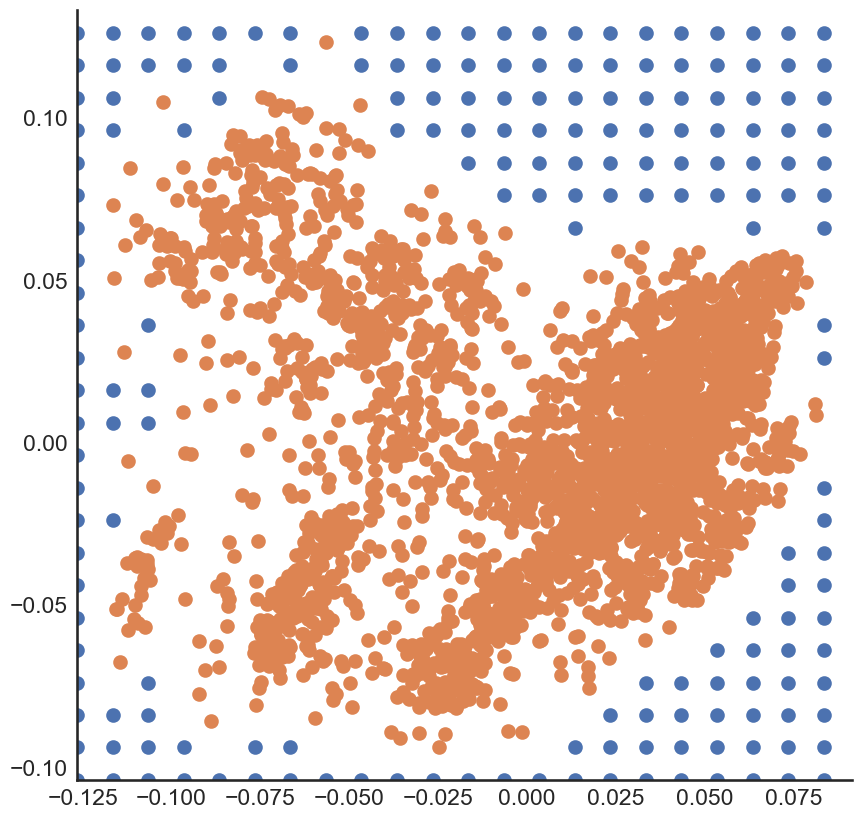

In [14]:
import math
import numpy as np


x, y, z = df_data.x, df_data.y, df_data.z
print(x.min(), x.max(), y.min(), y.max(), z.min(), z.max())
pnts_x = []
pnts_y = []
pnts_z = []

# Play with the parameters below to adjust the grid resolution
step_size = 0.01
offset = step_size
min_dist = 0.01
for outer in np.arange(x.min()-offset, x.max()+offset, step_size):
    
    for inner in np.arange(y.min() - offset, y.max() + offset, step_size):
        distances = [math.dist((p), (outer, inner)) for p in zip(df_data.x, df_data.y)]
        # print(np.array(distances).min(), outer, inner)

        if np.array(distances).min() > min_dist:
            pnts_x.append(outer)
            pnts_y.append(inner)
            pnts_z.append(0)

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plt.subplots(figsize=(10, 10))
plot_style_utils.prettify_ax(ax)

ax.scatter(pnts_x, pnts_y)
ax.scatter(df_data.x, df_data.y)
ax.set_xlim(x.min() - offset, x.max() + offset)
ax.set_ylim(y.min() - offset, y.max() + offset)

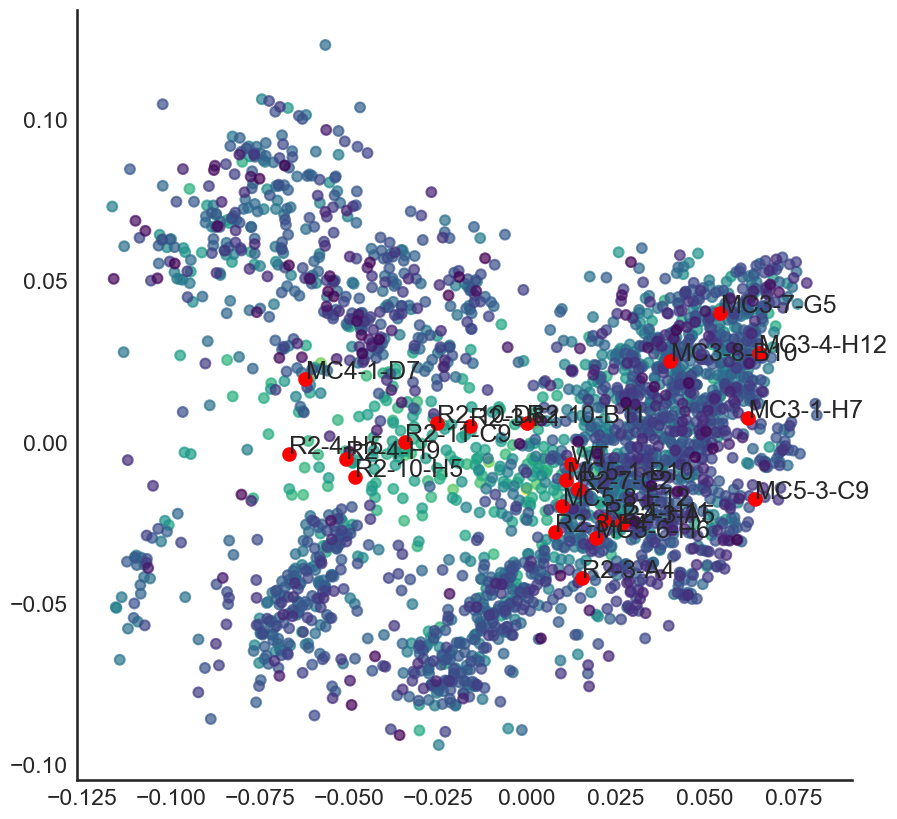

In [15]:

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plt.subplots(figsize=(10, 10))
plot_style_utils.prettify_ax(ax)

ax.scatter(x, y, c = z, cmap='viridis', s=50, alpha=0.7)

x = np.concatenate([x, pnts_x ])
y = np.concatenate([y, pnts_y ])
z = np.concatenate([z, pnts_z ])

ax.scatter(df_top.x, df_top.y, c = "red")

for _, row in df_top.iterrows():
    ax.annotate(row['name'], (row.x, row.y ))

# Interpolation to create a continuous surface

0.7582138394554931


Text(0.5, 1.0, 'Filled Contours Plot')

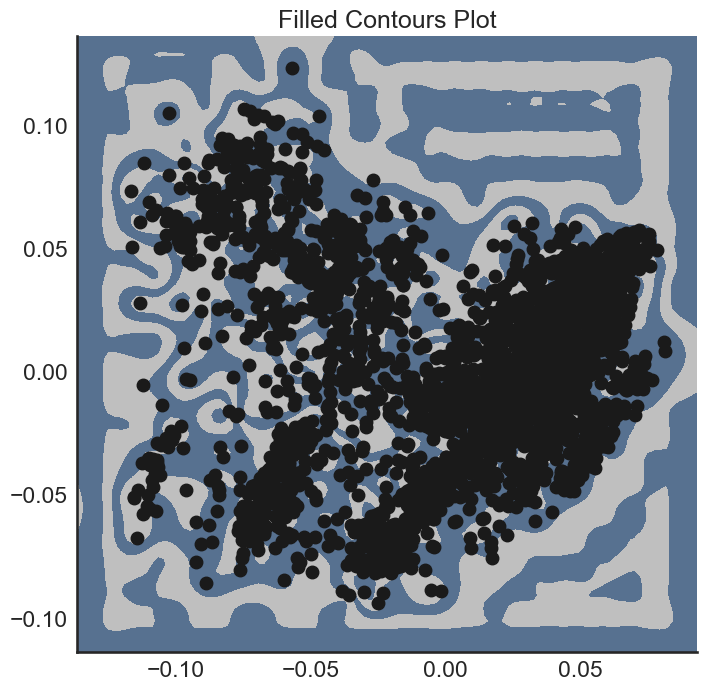

In [16]:
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy import ndimage


seed = 42
z = z / z.max()
np.random.seed(seed)

# Define the colors for the gradient (start and end)
colors = ["#bfbfbf", "#577190"]

# Create a new colormap
cmap_name = 'my_gradient'
my_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

offset = 0.01
yi, xi = np.mgrid[y.min() - offset:y.max() + offset:100j, x.min()-offset:x.max() + offset:100j]
interp = scipy.interpolate.Rbf(x, y, z, smooth=0.1)

zi = interp(xi, yi) 
print(zi.max())
nzi = ndimage.uniform_filter(zi, size=7, mode='constant')

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plt.subplots(figsize=(8, 8))
plot_style_utils.prettify_ax(ax)

ax.plot(x[:-len(pnts_x)], y[:-len(pnts_y)], "ko")
cp = ax.contourf(xi, yi, zi,colors=colors)
ax.set_title('Filled Contours Plot')

In [17]:
import scipy
from matplotlib.colors import LinearSegmentedColormap

offset = 0.01
yi, xi = np.mgrid[y.min() - offset:y.max() + offset:100j, x.min()-offset:x.max() + offset:100j]
interp = scipy.interpolate.Rbf(x, y, z, smooth=0.1)

zi = interp(xi, yi) 

# Define the colors for the gradient (start and end)
colors_us = ["#f0f0f0", "#577190"]
colors_17 = ["#f0f0f0", "#7e689c"] #d4d4d4 , ebebeb

cmap_us = LinearSegmentedColormap.from_list("us", colors_us)
cmap_17 = LinearSegmentedColormap.from_list("17", colors_17)

# Function to calculate color based on x and z
xmin, xmax = xi.min(), xi.max()
def calculate_color(x, z):
    color_us = cmap_us(z)
    color_17 = cmap_17(z)
    
    colors_between = LinearSegmentedColormap.from_list("btw", [color_us, color_17])
    x_normalized = (x - xmin) / (xmax - xmin)
    
    return colors_between(x_normalized)

colors = np.empty(xi.shape, dtype=object)
for i in range(xi.shape[0]):
    for j in range(xi.shape[1]):
        colors[i, j] = calculate_color(xi[i, j], zi[i, j])

In [18]:
# calculate nzi
from scipy import ndimage

yi, xi = np.mgrid[y.min()-offset:y.max()+offset:100j, x.min()-offset:x.max()+offset:100j]
#interp = scipy.interpolate.Rbf(x  + np.random.rand(*x.shape) / 100, y + np.random.rand(*y.shape) / 100, newz)
interp = scipy.interpolate.Rbf(x, y, z, smooth=0.35)

zi = interp(xi, yi) 
zi = np.maximum(zi, 0)
nzi = ndimage.uniform_filter(zi, size=2, mode='constant')
nzi = np.maximum(nzi, 0)

# Redefine the colors for the gradient (start and end)
colors_us = ["#f0f0f0", "#577190"]
colors_17 = ["#f0f0f0", "#7e689c"] #d4d4d4 , ebebeb

cmap_us = LinearSegmentedColormap.from_list("us", colors_us)
cmap_17 = LinearSegmentedColormap.from_list("17", colors_17)

# Function to calculate color based on x and z
xmin, xmax = xi.min(), xi.max()
def calculate_color(x, z):
    color_us = cmap_us(z)
    color_17 = cmap_17(z)
    
    colors_between = LinearSegmentedColormap.from_list("btw", [color_us, color_17])
    x_normalized = (x - xmin) / (xmax - xmin)
    
    return colors_between(x_normalized)

colors = np.empty(xi.shape, dtype=object)
for i in range(xi.shape[0]):
    for j in range(xi.shape[1]):
        colors[i, j] = calculate_color(xi[i, j], zi[i, j])

# Plot 3D fitness plot

In [19]:
# define variant colors
from utils import plot_style_utils

def get_variant_color(name):
    if name == 'WT':
        return 'blue'
    elif name.startswith('R2'):
        return 'orange'
    elif name.startswith('MC'):
        return 'green'
    else:
        return 'black'  # Fallback color for unexpected cases


/tmp/ipykernel_2790011/3840835507.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(


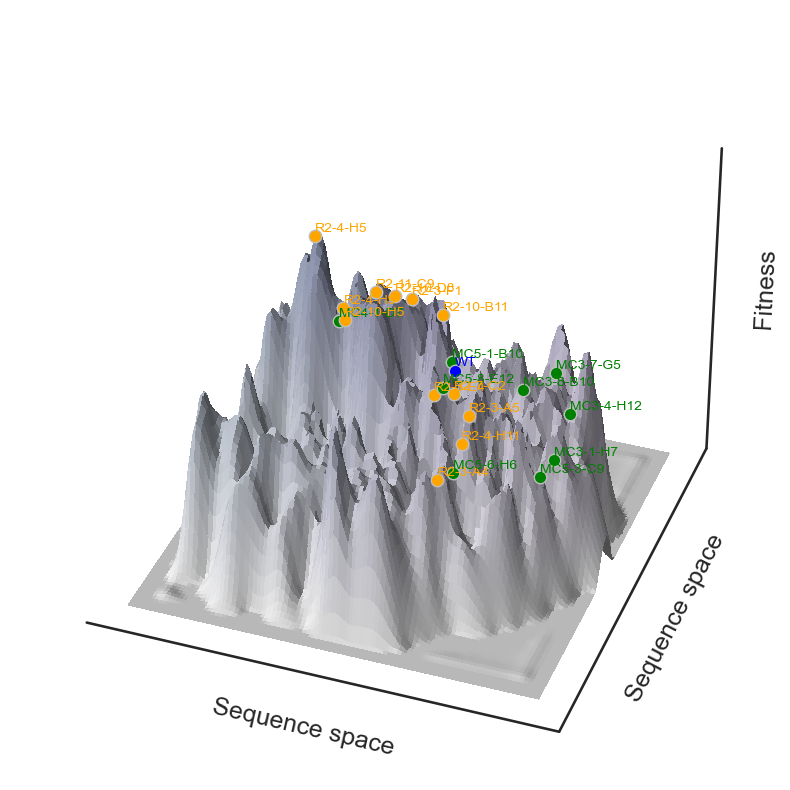

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_style_utils

measured_x = x
measured_y = y
measured_z = z
df = df_data

plot_style_utils.set_pub_plot_context(context="talk")
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
plot_style_utils.prettify_ax(ax)

ax.plot_surface(xi , yi  , nzi,
                facecolors=colors,
                rstride=1, cstride=1,alpha=1, edgecolor="none", linewidth=0, antialiased=False, zorder=1)


x_y_arr = np.stack([xi.flatten(), yi.flatten()],axis=1)

for idx, row in  df_top.iterrows():  
    point_x = row.x
    point_y = row.y
    point = [point_x, point_y]
    # Calculate distances
    distances = np.sqrt(np.sum((x_y_arr - point) ** 2, axis=1))
    
    # Find index of the minimum distance
    closest_point_index = np.argmin(distances)
    
    point_x = xi.flatten()[closest_point_index]
    point_y = yi.flatten()[closest_point_index]
    point_z = nzi.flatten()[closest_point_index]

    if point_z < 0.1:
        point_z = row.fitness
    
    point_color = get_variant_color(row['name'])
    ax.plot(
        [point_x],
        [point_y],
        [point_z],
        'ko',
        color=point_color,
        markeredgecolor="#bfbfbf",
        zorder=5
       )
    # label the point
    ax.text(point_x, point_y, point_z + 0.01, row['name'], fontsize=10, color=point_color, zorder=6)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlabel("Sequence space")
ax.set_ylabel("Sequence space")
ax.set_zlabel("Fitness")

ax.view_init(elev=35, azim=290)
plot_style_utils.save_for_pub(fig, path='figures/round2/fitness_landscape_3d')

# Plot 2D fitness plot

/tmp/ipykernel_2790011/1824275927.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(


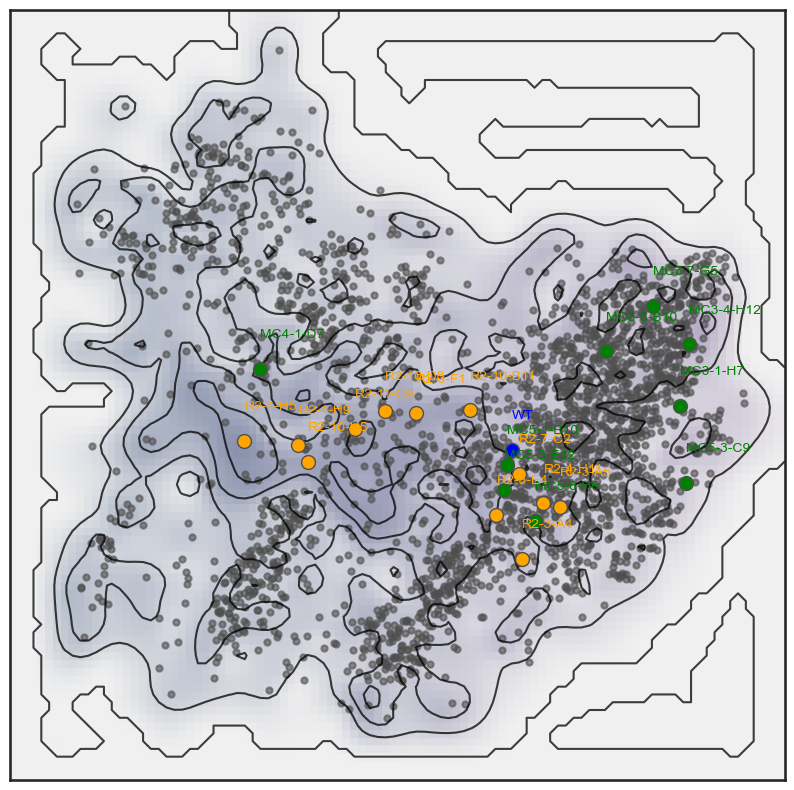

In [21]:
plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plt.subplots(figsize=(10, 10))
# plot_style_utils.prettify_ax(ax)


nzi = ndimage.uniform_filter(zi, size=2, mode='constant')

contour = ax.contour(xi, yi, zi, levels=5, colors='black', linewidths=1.5, alpha=0.75)

ax.scatter(xi.flatten(), yi.flatten(), color=colors.flatten(), s = 250, alpha=1, marker="s")
ax.scatter(df.x, df.y, color="#4f4f4f", alpha=0.6, s =20)

x_y_arr = np.stack([xi.flatten(), yi.flatten()],axis=1)

for idx, row in  df_top.iterrows():  
    point_x = row.x
    point_y = row.y
    point_color = get_variant_color(row['name'])

    ax.plot(
        [point_x],
        [point_y],
        'ko',
        color=point_color,
        markeredgecolor="#4f4f4f",
        markersize=10,
       ) 
    # label the point
    ax.text(point_x, point_y + 0.01, row['name'], fontsize=10, color=point_color)


ax.set_xticks([])
ax.set_yticks([])
plot_style_utils.save_for_pub(fig, path='figures/round2/fitness_landscape_2d')